In [1]:
pip install tensorflow numpy matplotlib


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install opencv-python


   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB 660.6 kB/s eta 0:00:59
   ---------------------------------------- 0.1/38.6 MB 1.1 MB/s eta 0:00:37
   ---------------------------------------- 0.2/38.6 MB 1.3 MB/s eta 0:00:30
   ---------------------------------------- 0.3/38.6 MB 1.5 MB/s eta 0:00:25
   ---------------------------------------- 0.4/38.6 MB 2.0 MB/s eta 0:00:20
    --------------------------------------- 0.6/38.6 MB 2.3 MB/s eta 0:00:17
    --------------------------------------- 0.8/38.6 MB 2.4 MB/s eta 0:00:16
   - -------------------------------------- 1.0/38.6 MB 2.8 MB/s eta 0:00:14
   - -------------------------------------- 1.2/38.6 MB 2.9 MB/s eta 0:00:14
   - -------------------------------------- 1.3/38.6 MB 2.9 MB/s eta 0:00:13
   - -------------------------------------- 1.4/38.6 MB 2.8 MB/s eta 0:00:14
   - -------------------------------------- 1.5/38.6 MB 2.7 MB/s eta 0:00:14
   -

In [3]:
import cv2
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import *
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam , Adamax
from tensorflow.keras.applications import *
from tensorflow.keras.callbacks import EarlyStopping
import warnings 

In [7]:
directory = "C:/Users/Asus Vivobook/Downloads/archive/chest_xray/train"

filepath =[]
label = []

folds = os.listdir(directory)

for fold in folds:
    f_path = os.path.join(directory , fold)
    
    imgs = os.listdir(f_path)
    
    for img in imgs:
        
        img_path = os.path.join(f_path , img)
        filepath.append(img_path)
        label.append(fold)
        
#Concat data paths with labels
file_path_series = pd.Series(filepath , name= 'filepath')
Label_path_series = pd.Series(label , name = 'label')
df_train = pd.concat([file_path_series ,Label_path_series ] , axis = 1)

In [8]:
df_train

,filepath,label
0,C:/Users/Asus Vivobook/Downloads/archive/chest...,NORMAL
1,C:/Users/Asus Vivobook/Downloads/archive/chest...,NORMAL
2,C:/Users/Asus Vivobook/Downloads/archive/chest...,NORMAL
3,C:/Users/Asus Vivobook/Downloads/archive/chest...,NORMAL
4,C:/Users/Asus Vivobook/Downloads/archive/chest...,NORMAL
...,...,...
5211,C:/Users/Asus Vivobook/Downloads/archive/chest...,PNEUMONIA
5212,C:/Users/Asus Vivobook/Downloads/archive/chest...,PNEUMONIA
5213,C:/Users/Asus Vivobook/Downloads/archive/chest...,PNEUMONIA
5214,C:/Users/Asus Vivobook/Downloads/archive/chest...,PNEUMONIA


In [9]:
directory = "C:/Users/Asus Vivobook/Downloads/archive/chest_xray/test"

filepath =[]
label = []

folds = os.listdir(directory)

for fold in folds:
    f_path = os.path.join(directory , fold)
    
    imgs = os.listdir(f_path)
    
    for img in imgs:
        
        img_path = os.path.join(f_path , img)
        filepath.append(img_path)
        label.append(fold)
        
file_path_series = pd.Series(filepath , name= 'filepath')
Label_path_series = pd.Series(label , name = 'label')
df_test = pd.concat([file_path_series ,Label_path_series ] , axis = 1)

In [10]:
df_test.sample(5)

,filepath,label
285,C:/Users/Asus Vivobook/Downloads/archive/chest...,PNEUMONIA
593,C:/Users/Asus Vivobook/Downloads/archive/chest...,PNEUMONIA
280,C:/Users/Asus Vivobook/Downloads/archive/chest...,PNEUMONIA
206,C:/Users/Asus Vivobook/Downloads/archive/chest...,NORMAL
53,C:/Users/Asus Vivobook/Downloads/archive/chest...,NORMAL


In [11]:
print(f"The shape of The Train data is: {df_train.shape}")
print(f"The shape of The Test data is: {df_test.shape}")

The shape of The Train data is: (5216, 2)
The shape of The Test data is: (624, 2)


In [13]:
#Data_Dir
data_dir = 'C:/Users/Asus Vivobook/Downloads/archive/chest_xray/train'
test_dir = 'C:/Users/Asus Vivobook/Downloads/archive/chest_xray/test'

IMAGE_SIZE = (256,256)

print('Training Images:')
# Creating the training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.1,
    subset='training',
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=32)

#Testing  Data
print('Validation Images:')
validation_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir, 
    validation_split=0.1,
    subset='validation',
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=32)

print('Testing Images:')
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir, 
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=32)

Training Images:
Found 5216 files belonging to 2 classes.
Using 4695 files for training.
Validation Images:
Found 5216 files belonging to 2 classes.
Using 521 files for validation.
Testing Images:
Found 624 files belonging to 2 classes.


In [14]:
# Extract labels
train_labels = train_ds.class_names
test_labels = test_ds.class_names
validation_labels = validation_ds.class_names

# Encode Labels

# Define your class labels
class_labels = ['NORMAL', 'PNEUMONIA'] 

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder on the class labels
label_encoder.fit(class_labels)

# Transform the labels for training dataset
train_labels_encoded = label_encoder.transform(train_labels)

# Transform the labels for validation dataset
validation_labels_encoded = label_encoder.transform(validation_labels)

# Transform the labels for test dataset
test_labels_encoded = label_encoder.transform(test_labels)

In [15]:
# Shape of the dataset
for image_batch, labels_batch in train_ds:
    print("Shape of X_train: ", image_batch.shape)
    print("Shape of y_train: ", labels_batch.shape)
    break

Shape of X_train:  (32, 256, 256, 3)
Shape of y_train:  (32,)


In [16]:
# Normalizing Pixel Values 

# Train Data 
train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
# Val Data
validation_ds = validation_ds.map(lambda x, y: (x / 255.0, y))
# Test Data
test_ds = test_ds.map(lambda x, y: (x / 255.0, y))

In [17]:
#                         Visual Count of Train Label

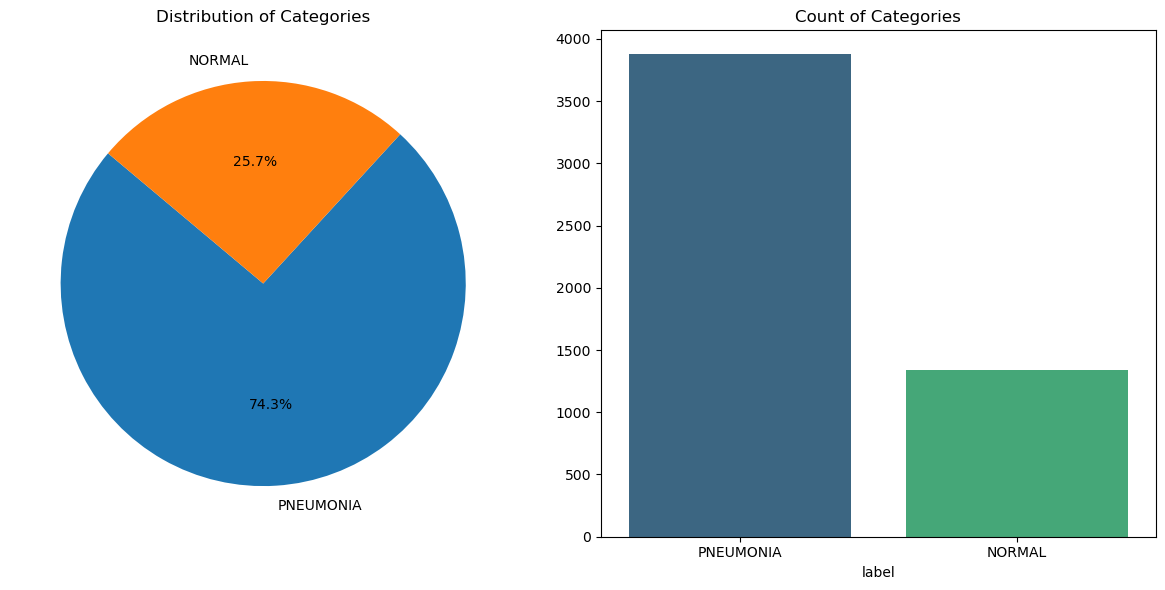

In [18]:
# Count the occurrences of each category in the 'category' column
count = df_train['label'].value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

# Plot pie chart on the first subplot
palette = sns.color_palette("viridis")
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories')

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")
axs[1].set_title('Count of Categories')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [19]:
# Visual Count of Test Label

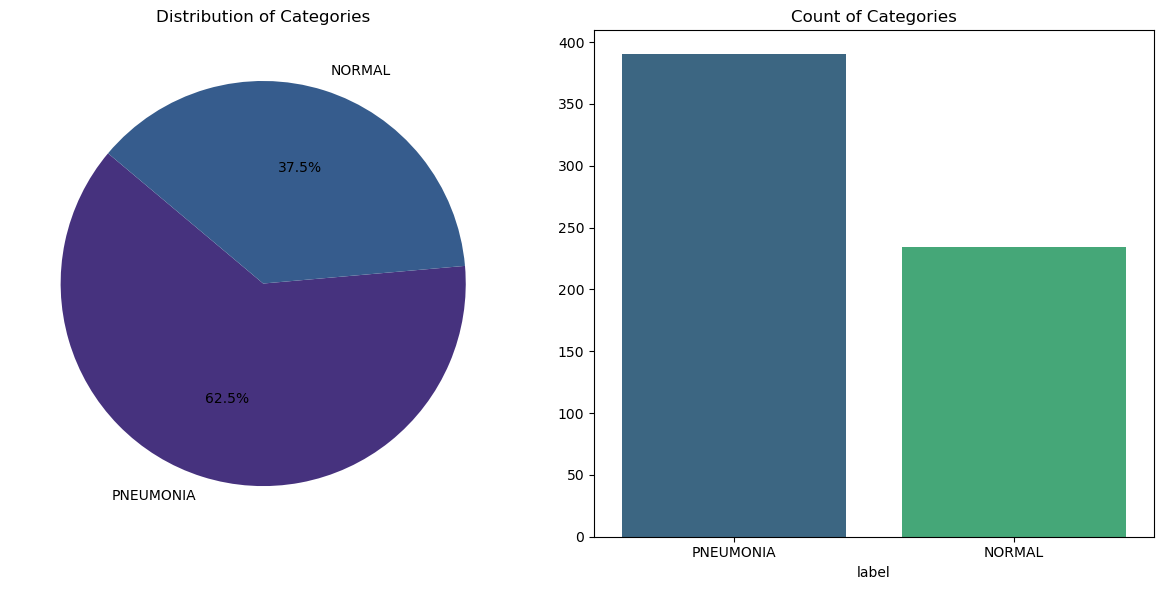

In [20]:
# Count the occurrences of each category in the 'category' column
count = df_test['label'].value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

# Plot pie chart on the first subplot
palette = sns.color_palette("viridis")
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories')

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")
axs[1].set_title('Count of Categories')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [21]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def visualize_images(path, num_images=5):
    # Get a list of image filenames in the specified path
    image_filenames = os.listdir(path)  
    # Limit the number of images to visualize if there are more than num_images
    num_images = min(num_images, len(image_filenames))  
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3), facecolor='white')
    if num_images == 1:
        axes = [axes]  # Make it a list for consistent access below
    for i, image_filename in enumerate(image_filenames[:num_images]):
        # Load the image using Matplotlib
        image_path = os.path.join(path, image_filename)
        image = mpimg.imread(image_path)   
        axes[i].imshow(image, cmap='gray')
        axes[i].axis('off')  
        axes[i].set_title(image_filename)  
    
    plt.tight_layout()
    plt.show()


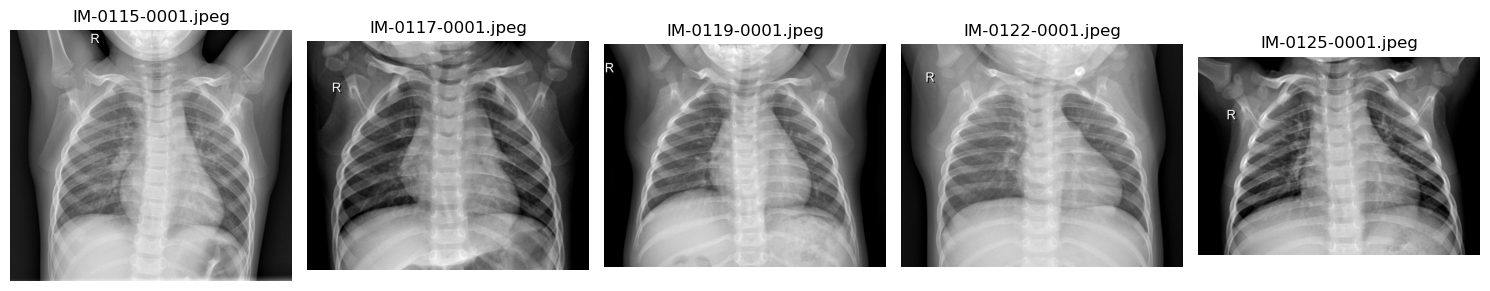

In [23]:
# Specify the path containing the images to visualize
path_to_visualize = "C:/Users/Asus Vivobook/Downloads/archive/chest_xray/train/NORMAL"

# Visualize some images from the specified path
visualize_images(path_to_visualize, num_images=5)

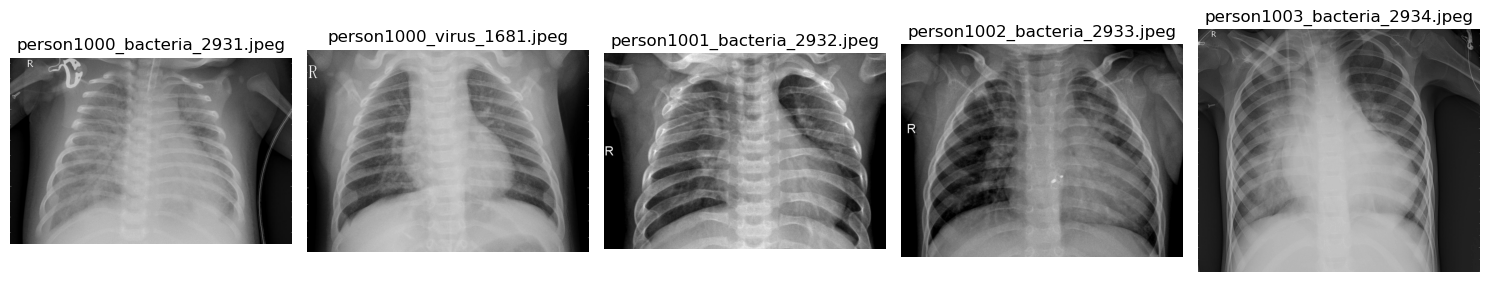

In [24]:
path_to_visualize = "C:/Users/Asus Vivobook/Downloads/archive/chest_xray/train/PNEUMONIA"

visualize_images(path_to_visualize, num_images=5)

In [25]:
train_ds

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# Xception

In [26]:
base_model = Xception(weights='imagenet', include_top=False, pooling='avg', input_shape=(256, 256, 3))

# Freeze the layers in the base model
base_model.trainable = False
model = Sequential()
model.add(base_model)
model.add(BatchNormalization())
model.add(Dropout(0.45)) 
model.add(Dense(220, activation='relu'))
model.add(Dropout(0.25)) 
model.add(Dense(60,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adamax(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.build((None, 256, 256, 3))
model.summary()

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 42s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ xception (Functional)                │ (None, 2048)                │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 2048)                │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 220)                 │         450,780 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 220)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 60)                  │          13,260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              61 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,333,773 (81.38 MB)

 Trainable params: 468,197 (1.79 MB)

 Non-trainable params: 20,865,576 (79.60 MB)

In [27]:
#Early_Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

#Fitting Model
history = model.fit(train_ds,
                        epochs= 20,
                        validation_data = validation_ds,
                        callbacks = early_stopping)

Epoch 1/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 341s 2s/step - accuracy: 0.8883 - loss: 0.2595 - val_accuracy: 0.9655 - val_loss: 0.1719
Epoch 2/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 332s 2s/step - accuracy: 0.9492 - loss: 0.1244 - val_accuracy: 0.9693 - val_loss: 0.1001
Epoch 3/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 333s 2s/step - accuracy: 0.9553 - loss: 0.1214 - val_accuracy: 0.9750 - val_loss: 0.0720
Epoch 4/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 327s 2s/step - accuracy: 0.9616 - loss: 0.1000 - val_accuracy: 0.9712 - val_loss: 0.0746
Epoch 5/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 327s 2s/step - accuracy: 0.9629 - loss: 0.0938 - val_accuracy: 0.9770 - val_loss: 0.0729
Epoch 6/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 327s 2s/step - accuracy: 0.9648 - loss: 0.0878 - val_accuracy: 0.9712 - val_loss: 0.0679
Epoch 7/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 327s 2s/step - accuracy: 0.9718 - loss: 0.0788 - val_accuracy: 0.9731 - val_loss: 0.0668
Epoch 8/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 354s 2s/step - accuracy: 0.9721 - loss: 0.0729 - val_accu

In [28]:
validation_loss, validation_accuracy = model.evaluate(validation_ds)

print("Validation Loss:", validation_loss)
print("Validation Accuracy:", validation_accuracy)

17/17 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.9685 - loss: 0.0658
Validation Loss: 0.06678130477666855
Validation Accuracy: 0.973128616809845


In [29]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


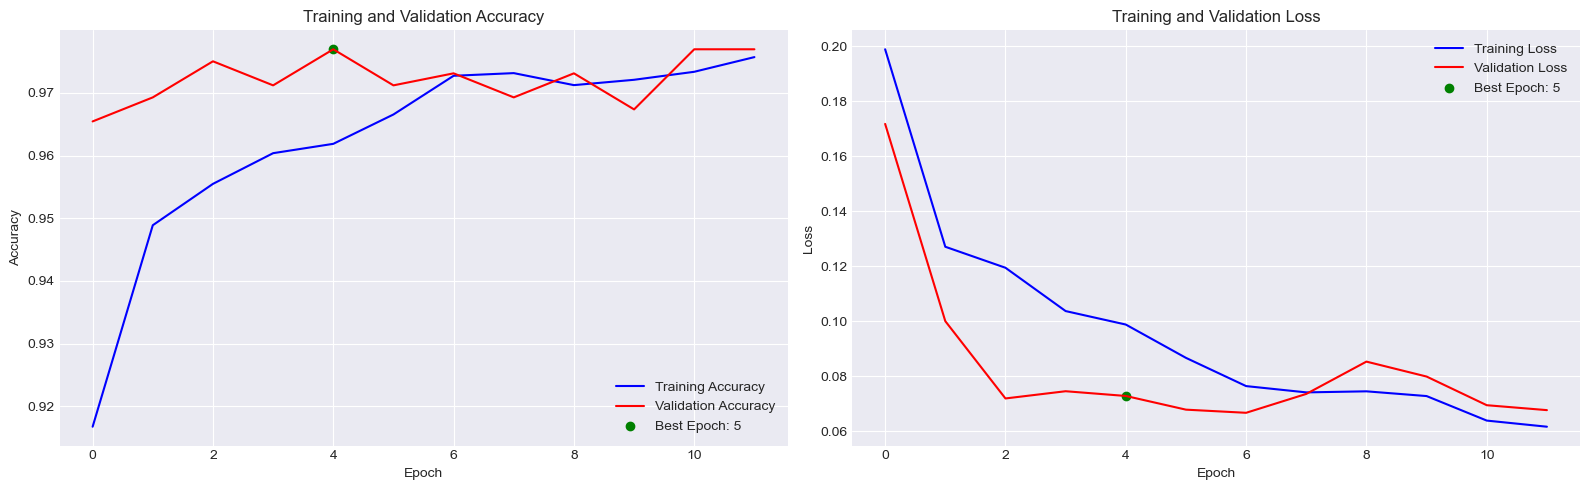

In [30]:
# Get the epoch with the highest validation accuracy
best_epoch = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1

# Set the background style
plt.style.use('seaborn-v0_8-darkgrid')

# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Plot training and validation accuracy
axs[0].plot(history.history['accuracy'], label='Training Accuracy', color='blue')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
axs[0].scatter(best_epoch - 1, history.history['val_accuracy'][best_epoch - 1], color='green', label=f'Best Epoch: {best_epoch}')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].legend()

# Plot training and validation loss
axs[1].plot(history.history['loss'], label='Training Loss', color='blue')
axs[1].plot(history.history['val_loss'], label='Validation Loss', color='red')
axs[1].scatter(best_epoch - 1, history.history['val_loss'][best_epoch - 1], color='green',label=f'Best Epoch: {best_epoch}')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

In [42]:
test_dir = 'C:/Users/Asus Vivobook/Downloads/archive/chest_xray/'
print('Testing Images:')
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir, 
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=32)

def plot_images_with_predictions(model, dataset, class_labels, num_images=40, num_images_per_row=5):
    predictions = model.predict(dataset)
    dataset_shuffled = dataset.shuffle(buffer_size=len(dataset))
    
    plt.figure(figsize=(15, 10))
    for i, (images, labels) in enumerate(dataset_shuffled.take(num_images)):
        images = images.numpy()      
        for j in range(len(images)):
            if i * num_images_per_row + j < num_images:  # Check if the total number of images exceeds the desired count
                predicted_class = class_labels[np.argmax(predictions[i * num_images_per_row + j])]
                true_class = class_labels[np.argmax(labels[j])]
                
                plt.subplot(num_images // num_images_per_row + 1, num_images_per_row, i * num_images_per_row + j + 1)
                plt.imshow(images[j].astype("uint8"))  
                plt.title(f'True: {true_class}\nPredicted: {predicted_class}')
                plt.axis('off')

    plt.tight_layout()
    plt.show()

print('Testing Images:')
plot_images_with_predictions(model, test_ds, class_labels, num_images=20)

Testing Images:
Found 17568 files belonging to 5 classes.
Testing Images:


InvalidArgumentError: {{function_node __wrapped__IteratorGetNext_output_types_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required.
	 [[{{node decode_image/DecodeImage}}]] [Op:IteratorGetNext] name: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


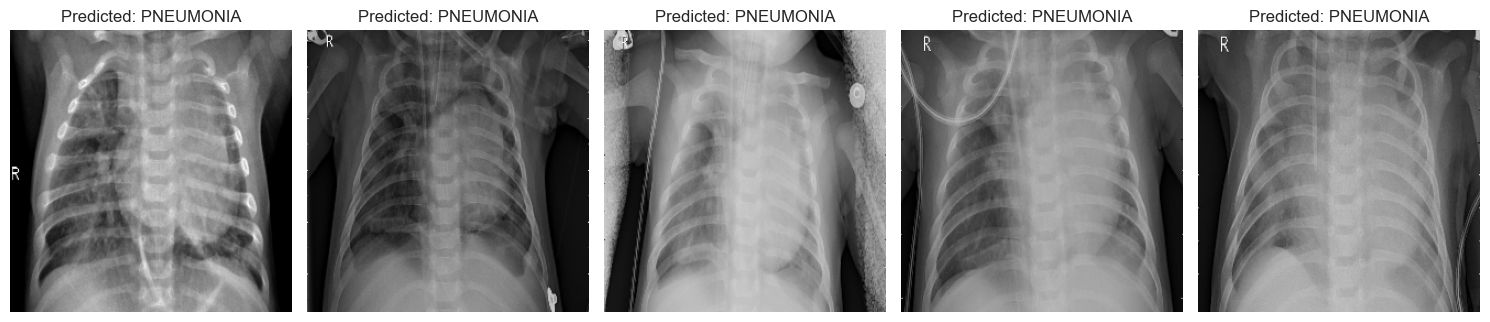

In [34]:
directory_path = 'C:/Users/Asus Vivobook/Downloads/archive/chest_xray/test/PNEUMONIA/'

image_files = os.listdir(directory_path)[:5]

fig, axs = plt.subplots(1, len(image_files), figsize=(15, 5))

for i, image_file in enumerate(image_files):
    img_path = os.path.join(directory_path, image_file)
    # Load the image using OpenCV
    img = cv2.imread(img_path)
    # Resize the image to (256, 256)
    img = cv2.resize(img, (256, 256)) 

    # Normalize pixel values
    img_array = img.astype(np.float32) / 255.0  

    img_array = np.expand_dims(img_array, axis=0)

    # Make predictions
    predictions = model.predict(img_array)
    actual_prediction = (predictions > 0.5).astype(int)

    axs[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  
    axs[i].axis('off')
    if actual_prediction[0][0] == 0:
        predicted_label = 'Normal'
    else:
        predicted_label = 'PNEUMONIA'
    axs[i].set_title(f'Predicted: {predicted_label}')

plt.tight_layout()
plt.show()

# VGG19

In [32]:
vgg_model = tf.keras.applications.VGG19(
    weights='imagenet',
    include_top = False,
#     input_shape = (224,224,3)
)

for layer in vgg_model.layers:
    layer.trainable=False
    
x = vgg_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128,activation='relu')(x)
# output layer
predictions = tf.keras.layers.Dense(1,activation='sigmoid')(x)

model = tf.keras.Model(inputs=vgg_model.input, outputs=predictions)

# to avoid overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=8)

# Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [33]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, None, None, 64)      │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, None, None, 64)      │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, None, None, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, None, None, 128)     │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, None, None, 128)     │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, None, None, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, None, None, 256)     │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, None, None, 256)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, None, None, 512)     │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,090,177 (76.64 MB)

 Trainable params: 65,793 (257.00 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [37]:
history = model.fit(train_ds,epochs=30, 
                    validation_data=validation_ds,
                     steps_per_epoch=100,
                    callbacks=[early_stopping,lr],
                    batch_size=32)

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 513s 5s/step - accuracy: 0.7892 - loss: 0.4701 - val_accuracy: 0.8829 - val_loss: 0.3041 - learning_rate: 0.0010
Epoch 2/30
 47/100 ━━━━━━━━━━━━━━━━━━━━ 3:24 4s/step - accuracy: 0.8823 - loss: 0.2724

C:\Users\Asus Vivobook\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 244s 2s/step - accuracy: 0.8869 - loss: 0.2632 - val_accuracy: 0.8887 - val_loss: 0.2612 - learning_rate: 0.0010
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1364s 14s/step - accuracy: 0.8950 - loss: 0.2476 - val_accuracy: 0.9117 - val_loss: 0.2163 - learning_rate: 0.0010
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 168s 2s/step - accuracy: 0.9081 - loss: 0.2146 - val_accuracy: 0.9117 - val_loss: 0.2044 - learning_rate: 0.0010
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 333s 3s/step - accuracy: 0.9297 - loss: 0.1889 - val_accuracy: 0.9251 - val_loss: 0.1877 - learning_rate: 0.0010
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.9279 - loss: 0.1856 - val_accuracy: 0.9251 - val_loss: 0.1858 - learning_rate: 0.0010
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 334s 3s/step - accuracy: 0.9420 - loss: 0.1583 - val_accuracy: 0.9463 - val_loss: 0.1486 - learning_rate: 0.0010
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.9519 - loss: 0.1373 - va

In [39]:
# Evaluating the model on train and test
score = model.evaluate(train_ds)

print("Train Loss: ", score[0])
print("Train Accuracy: ", score[1])

147/147 ━━━━━━━━━━━━━━━━━━━━ 412s 3s/step - accuracy: 0.9609 - loss: 0.0891
Train Loss:  0.09343880414962769
Train Accuracy:  0.9620873332023621


In [40]:
# Test data
score = model.evaluate(validation_ds)

print("Test Loss: ", score[0])
print("Test Accuracy: ", score[1])

17/17 ━━━━━━━━━━━━━━━━━━━━ 46s 3s/step - accuracy: 0.9631 - loss: 0.1033
Test Loss:  0.10749269276857376
Test Accuracy:  0.9539347290992737


Text(0.5, 1.0, 'Accuracy Evolution')

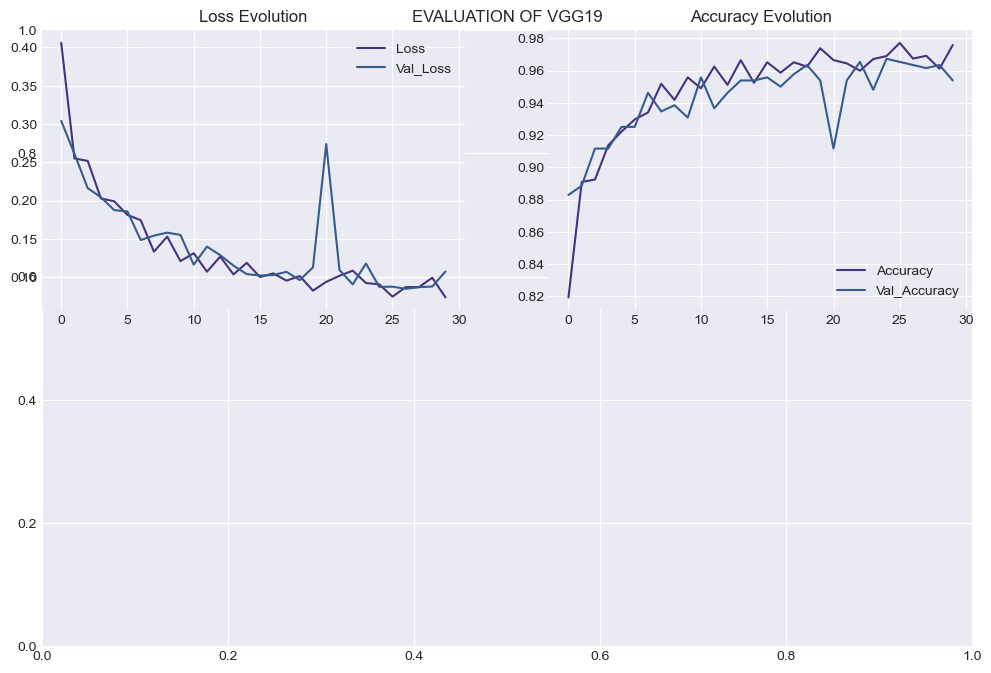

In [41]:
plt.figure(figsize=(12, 8))
plt.title('EVALUATION OF VGG19')

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')